In [2]:
import numpy as np 
import pandas as pd 
import re
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt
import warnings

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
new_dataset_spanish = pd.read_csv('/Users/migue/Desktop/TFM_Git/Dossier/modelo/datasets/Espanhol/dataset_noticias.csv')

new_dataset_spanish.tail()

,class,Text
1995,True,El Consejo de Gobierno ha dado su visto bueno...
1996,True,Investigadores valencianos han desarrollado u...
1997,True,Los arrestados actuaban en coches y en establ...
1998,True,El Rey ha encargado este miércoles a Pedro Sá...
1999,True,Las pruebas realizadas en el Centro Nacional ...


In [5]:
new_dataset_spanish.isnull().sum()

class    0
Text     0
dtype: int64

In [6]:
new_dataset_spanish= new_dataset_spanish.fillna(' ')

In [7]:
#new_dataset_spanish.drop('Link', axis=1, inplace=True)
#new_dataset_spanish.drop('Source', axis=1, inplace=True)
#new_dataset_spanish.drop('Topic', axis=1, inplace=True)
#new_dataset_spanish.drop('Headline', axis=1, inplace=True)
#new_dataset_spanish.drop('Id', axis=1, inplace=True)

new_dataset_spanish = new_dataset_spanish.rename(columns={'class': 'label'})

In [8]:
new_dataset_spanish.head()
new_dataset_spanish.shape[0]

2000

In [9]:
new_dataset_spanish = new_dataset_spanish.replace({'True': 1, 'Fake': 0})

In [10]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('spanish')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [11]:
new_dataset_spanish['Text'] = new_dataset_spanish['Text'].apply(stemming)

In [12]:
new_dataset_spanish.shape

(2000, 2)

In [13]:
X = new_dataset_spanish['Text']
Y = new_dataset_spanish['label']

In [14]:
print(X.shape)
print(Y.shape)

(2000,)
(2000,)


In [42]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: label, Length: 2000, dtype: int32


In [15]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2, random_state=0)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits
{'C': 100, 'class_weight': 'balanced', 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
0.7635063777301614


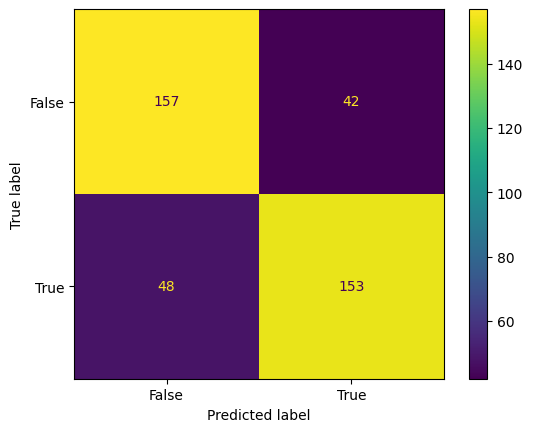

              precision    recall  f1-score   support

       False       0.77      0.79      0.78       199
        True       0.78      0.76      0.77       201

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.78      0.77       400



In [17]:
warnings.filterwarnings("ignore")   
ss = StratifiedKFold(n_splits=5, shuffle=True,  random_state=1)
param_grid = {'penalty': ['l2','l1','elasticnet'],
             'solver':['sag','lbfgs'],
              'class_weight':['dict','balanced'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver':['lbfgs', 'liblinear', 'newton-cg'],
              'multi_class':['auto', 'ovr', 'multinomial']
             }
grid = GridSearchCV(LogisticRegression(random_state=0), param_grid, cv=ss,scoring='f1', return_train_score=False,verbose=1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

logReg_score = grid.best_score_
logReg_params = grid.best_params_

grid_predictions = grid.predict(x_test) 

cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid.classes_)
disp.plot()
plt.show()
 
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.500 total time=   0.2s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.556 total time=   0.2s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.659 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

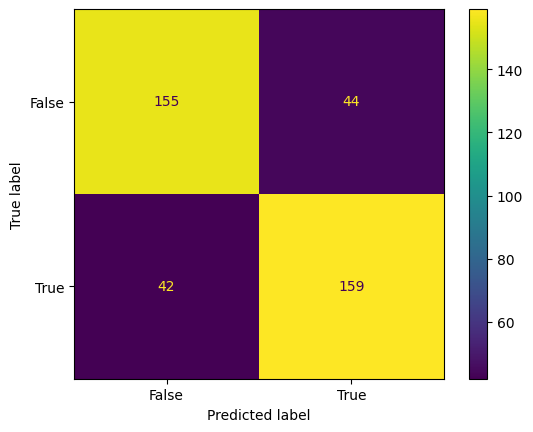

              precision    recall  f1-score   support

       False       0.79      0.78      0.78       199
        True       0.78      0.79      0.79       201

    accuracy                           0.79       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.79      0.79      0.78       400



In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=5)

grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

svc_score = grid.best_score_
svc_params = grid.best_params_

grid_predictions = grid.predict(x_test) 

cm = confusion_matrix(y_test, grid_predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=grid.classes_)
disp.plot()
plt.show()

print(classification_report(y_test, grid_predictions)) 